In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
diamonds=pd.read_csv('diamonds_f.csv')

In [3]:
diamonds.head()

,Unnamed: 0,carat,color,clarity,cut,depth,table,price,x,y,z
0,0,0.23,5,1,Ideal,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,5,2,Premium,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,5,4,Good,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,1,3,Premium,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,0,1,Good,63.3,58.0,335,4.34,4.35,2.75


[Text(0.5, 0, 'Weight (ct)'),
 Text(0, 0.5, 'Price (USD)'),
 Text(0.5, 1.0, 'Weight vs Price')]

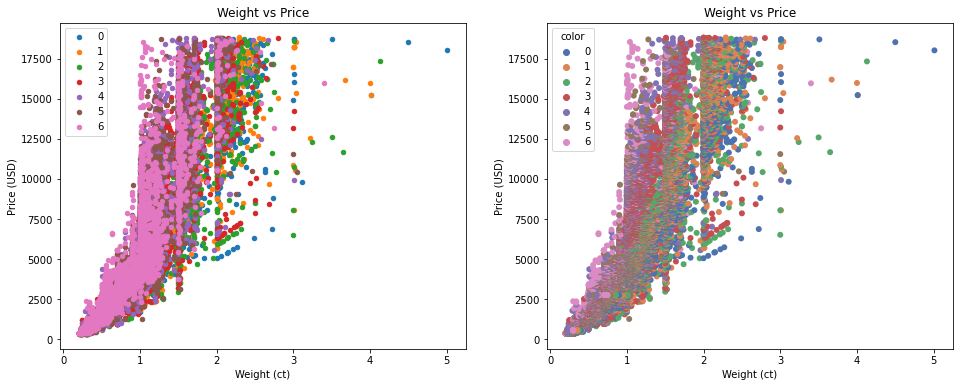

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
colors = {0:'tab:blue', 1:'tab:orange', 2:'tab:green', 3:'tab:red', 4:'tab:purple', 5:'tab:brown', 6:'tab:pink'}
grouped = diamonds.groupby('color')
for key, group in grouped:
    group.plot(ax=axes[0], kind='scatter', x='carat', y='price', title="Weight vs Price", xlabel='Weight (ct)', ylabel='Price (USD)', label=key, color=colors[key])
    

sns.scatterplot(data=diamonds, x="carat", y="price", hue="color", ax=axes[1], palette='deep', ec=None).set(xlabel='Weight (ct)', ylabel='Price (USD)', title="Weight vs Price")


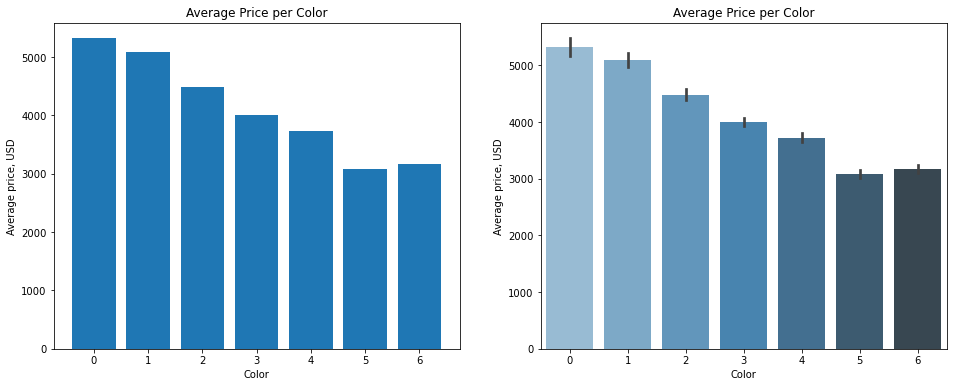

In [5]:
avg_price = diamonds.groupby("color").mean(['price'])

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.bar(avg_price.index, avg_price.price)
plt.title("Average Price per Color")
plt.xlabel("Color")
plt.ylabel("Average price, USD")

plt.subplot(1, 2, 2)
sns.barplot(data=diamonds, x="color", y="price", palette="Blues_d").set(xlabel="Color", ylabel="Average price, USD", title="Average Price per Color")

plt.show()

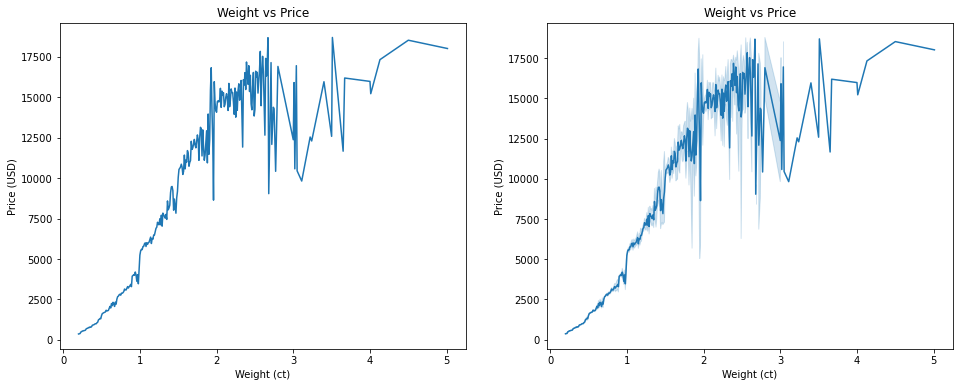

In [6]:
avg=diamonds.groupby('carat').mean(['price'])

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(avg.index, avg.price)
plt.title("Weight vs Price")
plt.xlabel("Weight (ct)")
plt.ylabel("Price (USD)")

plt.subplot(1, 2, 2)

sns.lineplot(data=diamonds, x="carat", y="price", palette='deep').set(xlabel="Weight (ct)", ylabel="Price (USD)", title="Weight vs Price")
plt.show()

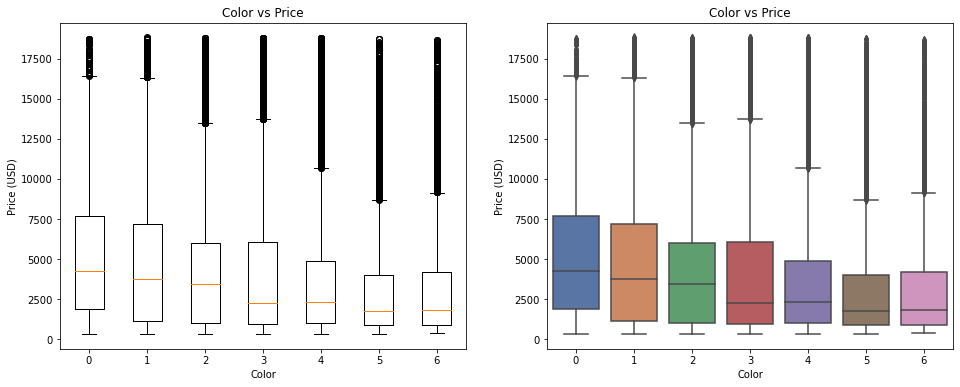

In [7]:
color0 = diamonds[(diamonds['color'] ==0) & (diamonds['price'] < 20000)]
color1= diamonds[(diamonds['color'] ==1) & (diamonds['price'] < 20000)]
color2 = diamonds[(diamonds['color'] ==2) & (diamonds['price'] < 20000)]
color3 = diamonds[(diamonds['color'] ==3) & (diamonds['price'] < 20000)]
color4 = diamonds[(diamonds['color'] ==4) & (diamonds['price'] < 20000)]
color5=diamonds[(diamonds['color'] ==5) & (diamonds['price'] < 20000)]
color6=diamonds[(diamonds['color'] ==6) & (diamonds['price'] < 20000)]
                
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
    
plt.boxplot([color0['price'], color1['price'], color2['price'], color3['price'], color4['price'], color5['price'], color6['price']])

plt.xticks((1,2,3,4,5, 6,7), [0, 1, 2, 3, 4, 5, 6])
plt.title("Color vs Price")
plt.xlabel("Color")
plt.ylabel("Price (USD)") 

plt.subplot(1, 2, 2)
sns.boxplot(x="color", y="price", data=diamonds, palette='deep').set(title="Color vs Price", xlabel="Color", ylabel="Price (USD)")

plt.show()

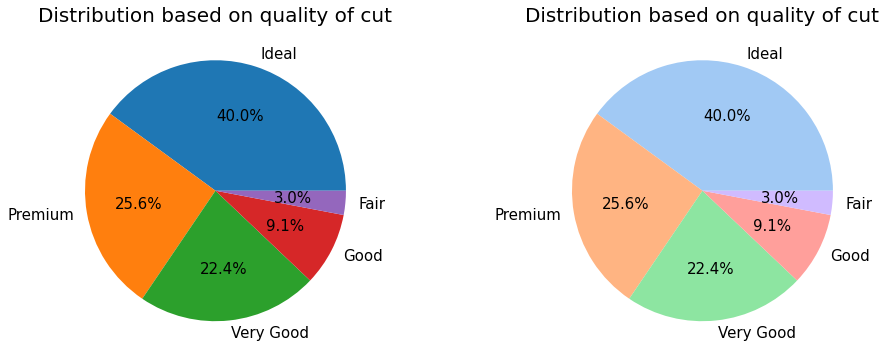

In [8]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)

cut_dist = pd.DataFrame(diamonds["cut"].value_counts())

plt.pie(cut_dist.cut, labels=cut_dist.index, autopct='%1.1f%%', textprops={'fontsize': 15, 'fontweight' : 10, 'color' : 'Black'})

plt.title("Distribution based on quality of cut", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Black'})

plt.subplot(1, 2, 2)
colors = sns.color_palette('pastel')

plt.pie(cut_dist.cut, labels=cut_dist.index, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 15, 'fontweight' : 10, 'color' : 'Black'})

plt.title("Distribution based on quality of cut", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Black'})

plt.show()

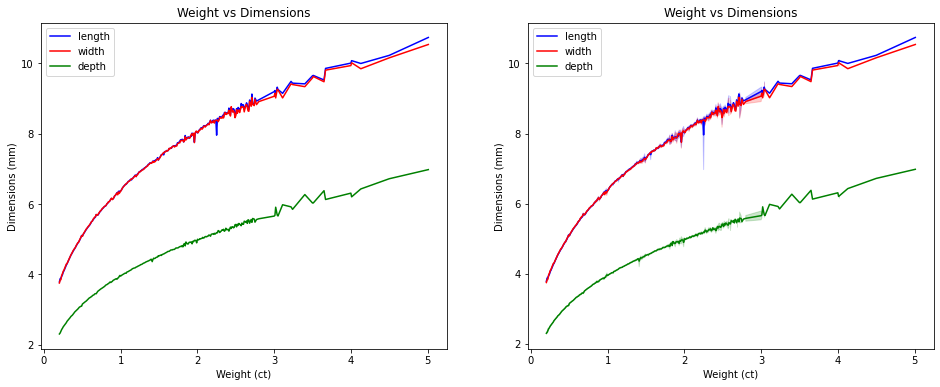

In [9]:
diamonds_x=diamonds.groupby('carat').mean(['x'])
diamonds_y=diamonds.groupby('carat').mean(['y'])
diamonds_z=diamonds.groupby('carat').mean(['z'])

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)

plt.plot(diamonds_x.index, diamonds_x.x, label='length', color='blue')
plt.plot(diamonds_y.index, diamonds_y.y, label='width', color='red')
plt.plot(diamonds_z.index, diamonds_z.z, label='depth', color='green')
plt.xlabel("Weight (ct)")
plt.ylabel("Dimensions (mm)")
plt.title("Weight vs Dimensions")
plt.legend()

plt.subplot(1, 2, 2)
sns.lineplot(data=diamonds, x="carat", y="x", label='length', color='blue').set(title="Weight vs Dimensions", xlabel="Weight (ct)", ylabel="Dimensions (mm)")
sns.lineplot(data=diamonds, x="carat", y="y", label='width', color='red')
sns.lineplot(data=diamonds, x="carat", y="z", label='depth', color='green')
plt.show()

Text(0.5, 0.92, 'Diamond dimensions')

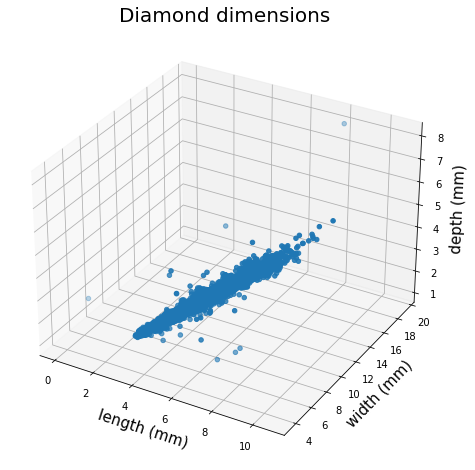

In [10]:
fig = plt.figure(figsize=(8,8))

ax = plt.axes(projection='3d')

ax.scatter3D(diamonds['x'], diamonds['y'], diamonds['z']);
ax.set_xlabel("length (mm)", fontsize=15)
ax.set_ylabel("width (mm)", fontsize=15)
ax.set_zlabel("depth (mm)", fontsize=15)
ax.set_title("Diamond dimensions", fontsize=20)

Text(0.5, 0.92, 'Diamond dimensions')

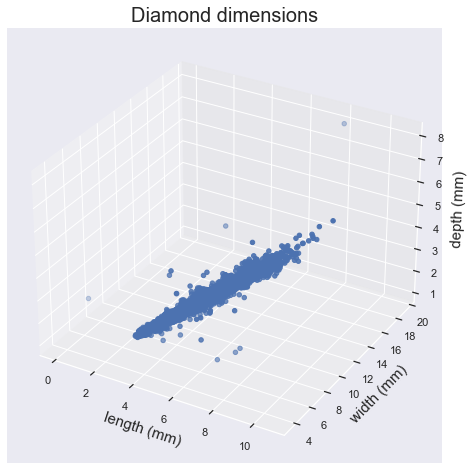

In [11]:
fig = plt.figure(figsize=(8,8))
sns.set(style = "darkgrid")
ax = plt.axes(projection='3d')

ax.scatter3D(diamonds['x'], diamonds['y'], diamonds['z']);
ax.set_xlabel("length (mm)", fontsize=15)
ax.set_ylabel("width (mm)", fontsize=15)
ax.set_zlabel("depth (mm)", fontsize=15)
ax.set_title("Diamond dimensions", fontsize=20)

In [12]:
import math

In [13]:
diamonds_sub=diamonds[['color','clarity', 'cut', 'carat', 'price', 'depth']]

In [14]:
diamonds_sub=diamonds_sub.set_index('cut')

In [15]:
norm_diamonds_sub=(diamonds_sub-diamonds_sub.min())/(diamonds_sub.max()-diamonds_sub.min())

In [16]:
diamonds_sub_grouped=norm_diamonds_sub.groupby('cut').mean()

In [36]:
diamonds_sub_grouped

,color,clarity,carat,price,depth
cut,,,,,
Fair,0.524741,0.288820,0.175912,0.218022,0.807091
Good,0.571137,0.371848,0.134966,0.194781,0.783473
Ideal,0.578457,0.494024,0.104540,0.169300,0.733444
Premium,0.550444,0.391373,0.143858,0.230213,0.747887
Very Good,0.572242,0.428477,0.126067,0.197641,0.765148


In [19]:
labels=list(diamonds_sub_grouped.columns)
labels

['color', 'clarity', 'carat', 'price', 'depth']

In [33]:
labels = [*labels, labels[0]]

Fair=diamonds_sub_grouped[(diamonds_sub_grouped.index=='Fair')].values.flatten().tolist()
Fair = [*Fair, Fair[0]]
Good=diamonds_sub_grouped[(diamonds_sub_grouped.index=='Good')].values.flatten().tolist()
Good = [*Good, Good[0]]
Ideal=diamonds_sub_grouped[(diamonds_sub_grouped.index=='Ideal')].values.flatten().tolist()
Ideal = [*Ideal, Ideal[0]]
Premium=diamonds_sub_grouped[(diamonds_sub_grouped.index=='Premium')].values.flatten().tolist()
Premium = [*Premium, Premium[0]]
VeryGood=diamonds_sub_grouped[(diamonds_sub_grouped.index=='Very Good')].values.flatten().tolist()
VeryGood = [*VeryGood, VeryGood[0]]

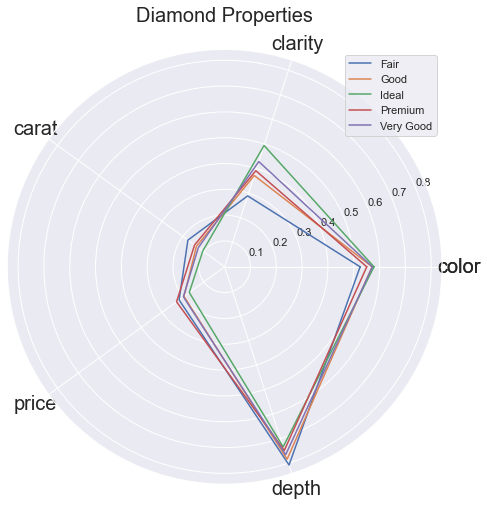

In [60]:
label_placement = np.linspace(start=0, stop=2*np.pi, num=len(Fair))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_placement, Fair, label='Fair')
plt.plot(label_placement, Good, label='Good')
plt.plot(label_placement, Ideal, label='Ideal')
plt.plot(label_placement, Premium, label='Premium')
plt.plot(label_placement, VeryGood, label='Very Good')
plt.title('Diamond Properties', size=20, y=1.05)

plt.legend(loc='upper right')
lines, labels = plt.thetagrids(np.degrees(label_placement), labels=labels, fontsize=20)